# Hands-On Pertemuan 9: Spark SQL

## Tujuan:
- Mengasah keterampilan analisis data menggunakan Spark SQL.
- Melakukan lebih banyak latihan SQL yang mengarah ke skenario dunia nyata.
- Mempersiapkan mahasiswa untuk menggunakan Spark SQL dalam proyek besar.


### 1. Refresher: Basic SQL Operations in Spark SQL
- **Tugas 1**: Ulangi pemahaman Anda tentang SQL dasar dengan menjalankan queries sederhana pada dataset di Spark SQL.


In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('HandsOnPertemuan9').getOrCreate()
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()


+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



### 2. Advanced Queries for Data Analysis
Gunakan queries lebih kompleks, melibatkan grouping, filtering, dan subqueries.
- **Tugas 2**: Buat SQL query yang menghitung total gaji berdasarkan jenis kelamin dan usia.


In [ ]:
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()


+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



- **Tugas Tambahan 2**:
1. Cari rata-rata gaji per departemen.




In [ ]:
spark.sql('''
SELECT DeptId, AVG(Salary) AS AvgSalary
FROM employees
GROUP BY DeptId
''').show()


+------+---------+
|DeptId|AvgSalary|
+------+---------+
|     1|   2850.0|
|     2|   4100.0|
+------+---------+



2. Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.

In [ ]:
spark.sql('''
WITH AvgSalaryByGender AS (
    SELECT Gender, AVG(Salary) AS AvgSalary
    FROM employees
    GROUP BY Gender
)
SELECT e.Name, e.Gender, e.Salary
FROM employees e
JOIN AvgSalaryByGender a
ON e.Gender = a.Gender
WHERE e.Salary > a.AvgSalary
''').show()


+-----+------+------+
| Name|Gender|Salary|
+-----+------+------+
|James|     M|  3000|
+-----+------+------+



3. Buat ranking karyawan berdasarkan gaji dalam departemen mereka.

In [ ]:
spark.sql('''
SELECT Name, DeptId, Salary,
    DENSE_RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS Rank
FROM employees
''').show()


+-----+------+------+----+
| Name|DeptId|Salary|Rank|
+-----+------+------+----+
|James|     1|  3000|   1|
|  Lee|     1|  2700|   2|
| Anna|     2|  4100|   1|
+-----+------+------+----+



### 3. Penggunaan Window Functions dan Subqueries
Latihan penggunaan window functions untuk menemukan karyawan dengan gaji tertinggi dan urutannya berdasarkan kelompok usia.
- **Tugas 3**: Terapkan window functions untuk menemukan top 3 karyawan dalam kelompok usia tertentu.


In [ ]:
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()


+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



### 4. Advanced Spark SQL Queries
Menjelajahi queries yang lebih kompleks yang melibatkan multiple joins, subqueries, dan window functions.
- **Tugas 4**: Demonstrasi penggunaan multi-level joins dan subqueries untuk analisis data yang mendalam.


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()


+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



Latihan mandiri untuk memperkuat pemahaman tentang Spark SQL dalam analisis data terdistribusi.
- **Tugas 5**: Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.



In [ ]:
spark.sql('''
SELECT d.DeptName, AVG(e.Salary) AS AvgSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
''').show()

spark.sql('''
SELECT e.Name, d.DeptName, e.Salary,
    DENSE_RANK() OVER (PARTITION BY d.DeptName ORDER BY e.Salary DESC) AS Rank
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
''').show()


+---------+---------+
| DeptName|AvgSalary|
+---------+---------+
|       HR|   2850.0|
|Marketing|   4100.0|
+---------+---------+

+-----+---------+------+----+
| Name| DeptName|Salary|Rank|
+-----+---------+------+----+
|James|       HR|  3000|   1|
|  Lee|       HR|  2700|   2|
| Anna|Marketing|  4100|   1|
+-----+---------+------+----+



- **Tugas 6**: Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.

In [ ]:
spark.sql('''
SELECT e.DeptId, e.Age, e.Salary,
    AVG(e.Salary) OVER (PARTITION BY e.DeptId ORDER BY e.Age) AS AvgSalaryByAge
FROM employees e
ORDER BY e.DeptId, e.Age
''').show()


+------+---+------+--------------+
|DeptId|Age|Salary|AvgSalaryByAge|
+------+---+------+--------------+
|     1| 23|  2700|        2700.0|
|     1| 34|  3000|        2850.0|
|     2| 28|  4100|        4100.0|
+------+---+------+--------------+



### 5. Advanced Data Analysis and Visualization
Penerapan teknik analisis data yang lebih canggih dan visualisasi menggunakan PySpark dan matplotlib.
- **Tugas 7**: Lakukan analisis tren gaji menggunakan Spark SQL dan visualisasikan hasilnya.


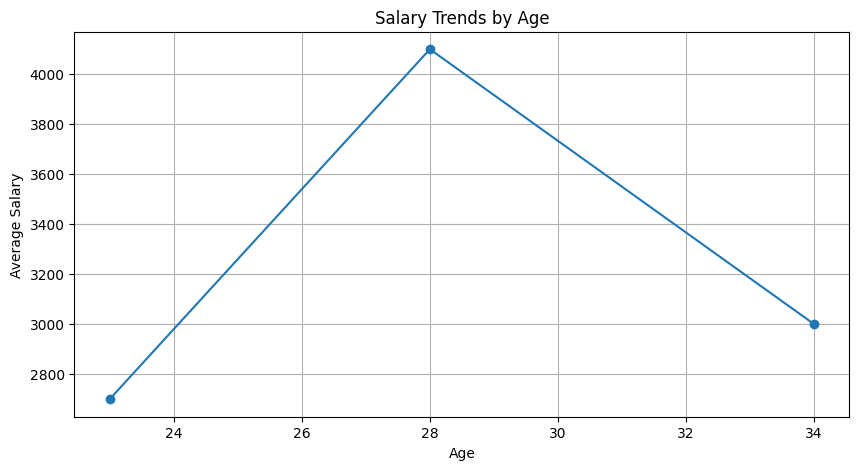

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()


### 6. Homework
- **Tugas 1**: Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.




In [11]:
# Query untuk mencari total gaji dan jumlah karyawan per departemen
salary_summary_df = spark.sql('''
SELECT d.DeptName, SUM(e.Salary) AS TotalSalary, COUNT(e.Name) AS EmployeeCount
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
''')

# Menampilkan tabel hasil query
salary_summary_df.show()

# Konversi ke Pandas untuk visualisasi
salary_summary_pd = salary_summary_df.toPandas()


+-----------+-----------+-------------+
|   DeptName|TotalSalary|EmployeeCount|
+-----------+-----------+-------------+
|Engineering|     141799|           37|
|    Finance|     122666|           33|
|  Marketing|     113260|           30|
+-----------+-----------+-------------+



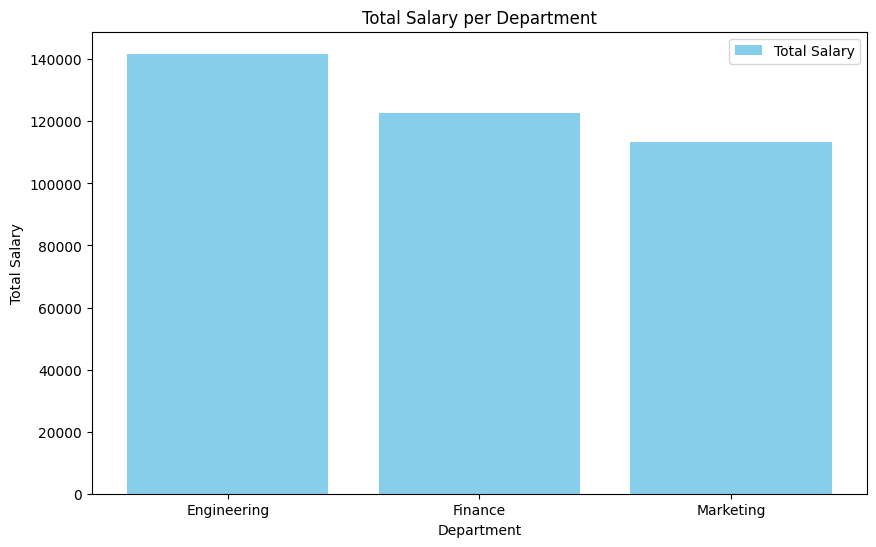

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(salary_summary_pd['DeptName'], salary_summary_pd['TotalSalary'], color='skyblue', label='Total Salary')
plt.xlabel('Department')
plt.ylabel('Total Salary')
plt.title('Total Salary per Department')
plt.legend()
plt.show()


- **Tugas 2**: Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart.

In [24]:
# Query SQL
high_salary_df = spark.sql('''
WITH AvgSalaryByAge AS (
    SELECT Age, AVG(Salary) AS AvgSalary
    FROM employees
    GROUP BY Age
)
SELECT e.Name, e.Age, e.Salary
FROM employees e
JOIN AvgSalaryByAge a ON e.Age = a.Age
WHERE e.Salary > a.AvgSalary
''')

# Menampilkan tabel hasil query
high_salary_df.show()

# Konversi ke Pandas untuk visualisasi
high_salary_pd = high_salary_df.toPandas()


+----+---+------+
|Name|Age|Salary|
+----+---+------+
+----+---+------+



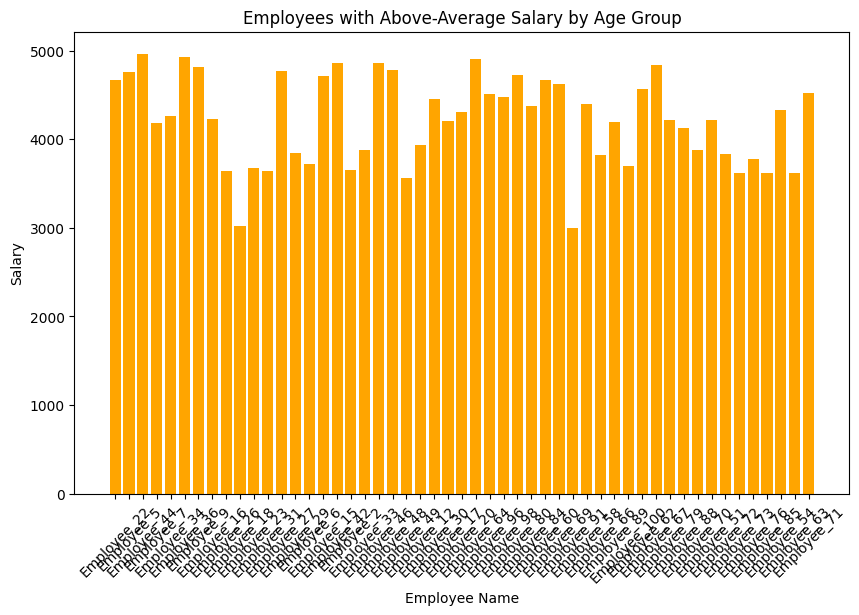

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(high_salary_pd['Name'], high_salary_pd['Salary'], color='orange')
plt.xlabel('Employee Name')
plt.ylabel('Salary')
plt.title('Employees with Above-Average Salary by Age Group')
plt.xticks(rotation=45)
plt.show()


- **Tugas 3**: Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti `SUM()`, `AVG()`, `COUNT()`, serta `JOIN` antar tabel serta buat visualisasi yang menarik.

In [16]:
# Query SQL untuk analisis mendalam
large_salary_analysis_df = spark.sql('''
SELECT d.DeptName, e.Gender, COUNT(e.Name) AS EmployeeCount, AVG(e.Salary) AS AvgSalary, SUM(e.Salary) AS TotalSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName, e.Gender
''')

# Menampilkan tabel hasil query
large_salary_analysis_df.show()

# Konversi ke Pandas untuk visualisasi
large_salary_analysis_pd = large_salary_analysis_df.toPandas()


+---------+------+-------------+---------+-----------+
| DeptName|Gender|EmployeeCount|AvgSalary|TotalSalary|
+---------+------+-------------+---------+-----------+
|Marketing|     F|            1|   4100.0|       4100|
|  Finance|     M|            2|   2850.0|       5700|
+---------+------+-------------+---------+-----------+



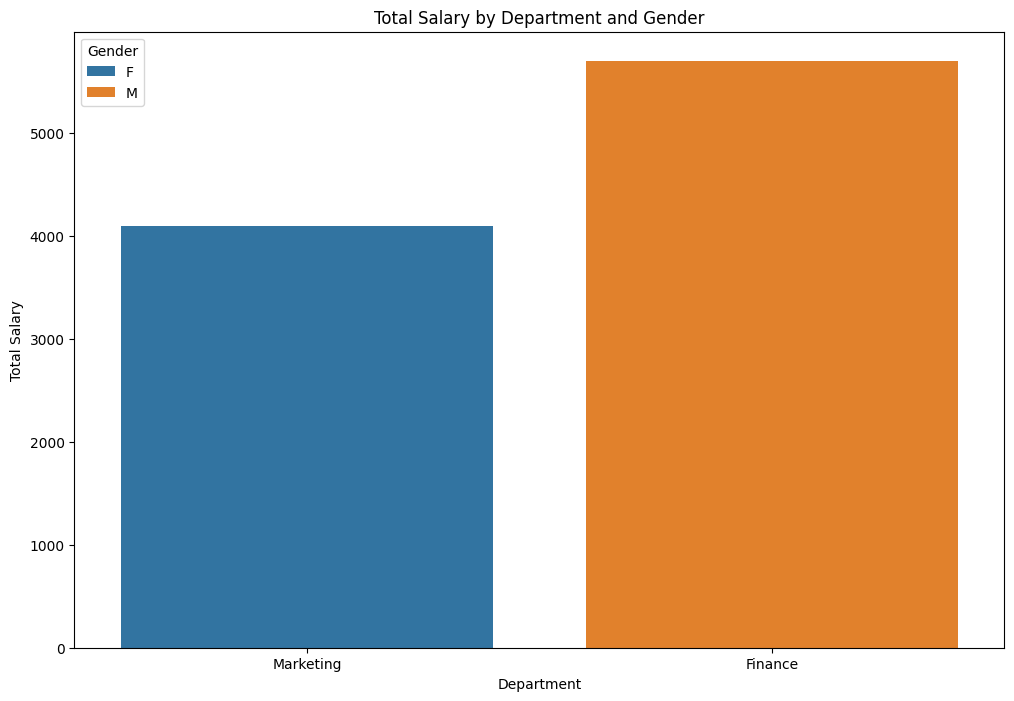

In [17]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(data=large_salary_analysis_pd, x='DeptName', y='TotalSalary', hue='Gender')
plt.xlabel('Department')
plt.ylabel('Total Salary')
plt.title('Total Salary by Department and Gender')
plt.show()
